# Predicting Employee Exit:


We will be working on Employee Data. This is employee attrition data. The 'left' named column represents exit from the company or not.

The data consists of categorical & number data. Thus, needs data preprocessing. Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column



Dataset Link https://github.com/tranghth-lux/data-science-complete-tutorial/blob/master/Data/HR_comma_sep.csv.txt

# Problems using Data Preprocessing

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Problem statement:

We will be working on Employee Data. This is employee attrition data. The 'left' named column represents exit from the company or not.

The data consists of categorical & number data. Thus, needs data preprocessing. Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column

## Load the data:

In [2]:
data = pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

## Data Cleaning & Data Preprocessing & Data Visualization:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [7]:
#  Check for missing values

data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

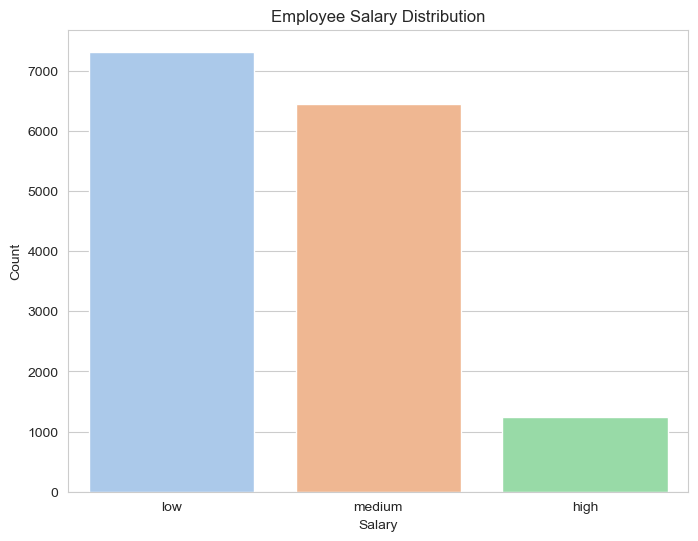

In [9]:
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='salary', palette='pastel')
plt.title('Employee Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [11]:
# Data preprocessing
# Encode categorical features

data['sales'] = le.fit_transform(data['sales'])
data['salary'] = le.fit_transform(data['salary'])

In [13]:
data['sales']

0        7
1        7
2        7
3        7
4        7
        ..
14994    8
14995    8
14996    8
14997    8
14998    8
Name: sales, Length: 14999, dtype: int32

In [14]:
data['salary']

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32

In [15]:
# Split data into features (X) and target (y)

X = data.drop(columns=['left'])
y = data['left']

## Split the data into training and testing sets:

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
9838,1.00,0.61,3,188,4,0,0,6,1
7689,0.16,0.78,4,196,5,0,0,9,0
6557,0.80,0.80,3,175,2,0,0,1,2
6872,0.66,0.86,4,112,6,0,0,2,2
820,0.11,0.93,7,284,4,0,0,9,1


## Apply Random Forest Classifier on train set:

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [20]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
9838,1.00,0.61,3,188,4,0,0,6,1
7689,0.16,0.78,4,196,5,0,0,9,0
6557,0.80,0.80,3,175,2,0,0,1,2
6872,0.66,0.86,4,112,6,0,0,2,2
820,0.11,0.93,7,284,4,0,0,9,1
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,8,1
13418,0.49,0.65,4,233,7,0,0,7,2
5390,0.66,0.73,5,249,2,0,0,8,2
860,0.79,1.00,4,218,5,0,0,7,1


## Perform Prediction on the X_test:

In [22]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Compare y_pred & y_test to get the accuracy of the models:

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9883333333333333

In [24]:
# Evaluate model performance

from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

